In [11]:
# Import Data
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator
bond_price = pd.read_csv("data/BondPrice.csv")

In [12]:
# Six Percent Loan of 1812 
# L1: 20048 
# Price history
six_percent_prices = bond_price[bond_price["L1 ID"] == 20048] 
# Drop columns with NaN 
clean_six_percent_prices = six_percent_prices.dropna(axis=1) 
print(clean_six_percent_prices)

    L1 ID   Series  1813-04-30  1813-05-31  1813-06-30  1813-07-31  \
50  20048  Average        93.0        92.0        93.0        91.0   

    1813-08-31  1813-09-30  1813-10-31  1813-11-30  ...  1824-12-31  \
50        91.0        90.0        91.0        91.0  ...      100.25   

    1825-01-31  1825-02-28  1825-03-31  1825-04-30  1825-05-31  1825-06-30  \
50      100.25      100.25      100.25      100.25      100.75       100.0   

    1825-07-31  1825-08-31  1825-09-30  
50      100.25      100.75       101.0  

[1 rows x 152 columns]


In [13]:
# Reformat dataframe 
six_percent_prices_melted = clean_six_percent_prices.melt(var_name='Timestamp', value_name='Price')
six_percent_prices_melted = six_percent_prices_melted.iloc[2:].reset_index(drop=True)
print(six_percent_prices_melted)

      Timestamp   Price
0    1813-04-30    93.0
1    1813-05-31    92.0
2    1813-06-30    93.0
3    1813-07-31    91.0
4    1813-08-31    91.0
..          ...     ...
145  1825-05-31  100.75
146  1825-06-30   100.0
147  1825-07-31  100.25
148  1825-08-31  100.75
149  1825-09-30   101.0

[150 rows x 2 columns]


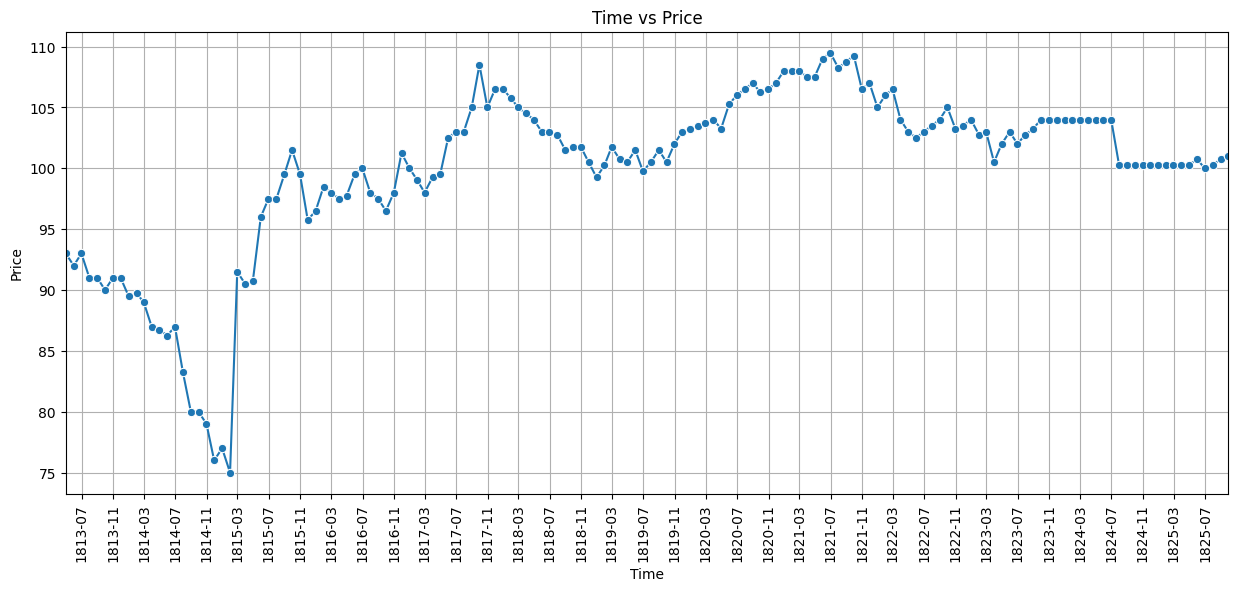

In [14]:
# Graph dataframe 
six_percent_prices_melted['Timestamp'] = pd.to_datetime(six_percent_prices_melted['Timestamp'])

# Set up Seaborn plot
plt.figure(figsize=(15, 6))
sns.lineplot(data=six_percent_prices_melted, x='Timestamp', y='Price', marker='o')

# Format x-axis ticks to show year and month
date_form = DateFormatter("%Y-%m")
plt.gca().xaxis.set_major_formatter(date_form)
plt.gca().xaxis.set_major_locator(MonthLocator(interval=4))

# Get the minimum and maximum dates with data (assuming 'date' is a datetime type)
min_date = six_percent_prices_melted['Timestamp'].min()
max_date = six_percent_prices_melted['Timestamp'].max()

# Set the x-axis limits to exclude extra years
plt.xlim(min_date, max_date)

# Enhance plot aesthetics (optional)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Time vs Price')
plt.grid(True)

plt.show()